# Activation Functions

This notebook is used to explore activations functions in detail, describe their advantages and disadvantages, and gain an intuition into when to use each one.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set the matplotlib backend
%matplotlib inline

# Set default plot parameters
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ensure we get the same random numbers each time by using a constant seed value. (for debugging purposes only)
np.random.seed(1)

### Sigmoid

A sigmoid function is a special case of the logistic function.  So before we define what a sigmoid function is, let's first see what a logistic function looks like and then define the mathematical definition.  A logistic function or logistic curve is a common "S" shape (sigmoid curve), with equation:

> $f(x)=\dfrac{L}{1+e^{-k(x-x_0)}}$

where 
 - e = the natural logarithm base (also known as Euler's number).
 - $x_0$ = the x-value of the sigmoid's midpoint.
 - L = the curve's maximum value.
 - k = the logistic growth rate or steepness of the curve.

This will make more sense once you look at the code and figure below. The paramters, `L`, `k`, and `x0` can be experimented/changed to see how the graph reacts.

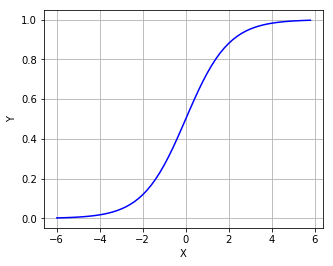

In [5]:
# Function paramters to experiment with
L = 1
k = 1
x0 = 0

# Logistic function
def logistic(L, k, x, x0):
    y = L/(1+np.exp(-k*(x-x0)))
    return y

# Compute logistic function
x = np.arange(-6., 6., 0.2)
y = logistic(L, k, x, x0)

# Plot the results
plt.plot(x,y,color="blue")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

Often, sigmoid function refers to the special case of the logistic function and is a common "S" shape (sigmoid curve).  When the paramters of the logistic function are `L=1`, `k=1`, and `x0=0`, then the logistic function is said to be a sigmoid function.  The sigmoid function is defined as follows:
> $f(x)=\dfrac{1}{1+e^{-x}}$

Fun Fact: 
The word sigmoid refers to the Greek letter $\varsigma$ (sigma).  This greek letter is equivalent to the English letter "S", which is why this curve is called a sigmoid curve

Below is the sigmoid function in code and plotted in the figure below.

In [2]:
# Sigmoid function
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

# Compute sigmoid function
x = np.arange(-6., 6., 0.2)
y = sigmoid(x)

# Plot the results
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

NameError: name 'np' is not defined

Now let's look at this functions characteristics.  We can see that the curve looks like it goes from 0 to 1 on the y-axis.  In fact the curve never touches y=0 or y=1 but it goes to infinity.  It is said that the curve is contrained by a pair of horizontal asymptotes as $x \rightarrow \pm \infty$

### Tanh (Hyperbolic Tangent Function)

The Tanh is another sigmoidal "S" shaped curve and in fact it's just a particular sigmoid function and the relationship is $2 \sigma (2 \dot x) - 1$.  Let's see what the function looks like and then define the mathematical definition.

> $tanh(x)=\dfrac{sinh(x)}{cosh(x)}=\dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}=\dfrac{e^{2x}-1}{e^{2x}+1}$

Below is the tanh function in code and plotted in the figure below. (Instead of created a tanh function like the sigmoid function above, the numpy.tanh built in function is used)

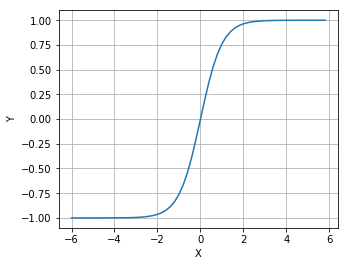

In [7]:
# Compute tanh function
x = np.arange(-6., 6., 0.2)
y = np.tanh(x)

# Plot the results
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

Unlike the sigmoid curve, this curves mid-point is 0 instead of 0.5.  It is also contrained by a pair of horizontal asymptotes as $x \rightarrow \pm \infty$  The tanh function is preferred over the sigmoid function to be used as an activation function.  I'm not quite sure what the details around why this is the case yet, but as soon as I learn it, I'll be sure to update this notebook.  I've read that the answer is in this known [whitepaper](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

### ReLU (Rectified Linear Units)

The ReLU function is the most commonly used activation function in deep learning models.  If you are unsure what activation function to use in your network, ReLU is usually a good first choice The function returns 0 if it receives any negative input, but for any positive value x, it returns that value back. Let's see what the function looks like and then define the mathematical definition.
> $f(x)=max(0,x)$

Below is the ReLU function in code and plotted in the figure below.

In [1]:
# ReLU function
def relu(x):
    y = np.maximum(0, x)
    return y

# Compute tanh function
x = np.arange(-6., 6., 0.2)
y = relu(x)

# Plot the results
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

NameError: name 'np' is not defined

The ReLU is a linear (identity) for all positive values, and zero for all negative values.

#### Advantages

 - It's cheap to compute as there is no complicated math.  Therefore the model can take less time to train or run.
 - It converges faster.  The slope doesn't plateau, or "saturate", when x gets large. It avoids and rectifies vanishing gradient problem which  the sigmoid or tanh functions have
 - It's sparsely activated.  Since ReLU is 0 for all negative values, it's likely for any given unit to not activate at all.